# Prediction if the individual can be approved of loan

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import pickle
import joblib

In [2]:
df = pd.read_csv("bankloan.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.shape

(614, 13)

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    float64
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int64  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 52.5+ KB


In [25]:
df.isna().any()
df =df.drop('Loan_ID',axis=1)
df['LoanAmount'] = (df['LoanAmount']*1000).astype(int)

KeyError: "['Loan_ID'] not found in axis"

In [11]:
## we can see that the data is imbalanced

Counter(df['Loan_Status'])

Counter({'Y': 332, 'N': 148})

In [28]:
pre_y = df['Loan_Status']
pre_x = df.drop('Loan_Status',axis = 1)
## Hot encoding
dm_x = pd.get_dummies(pre_x).astype(int)
dm_y = pre_y.replace({'Y':1,'N':0})
columns = dm_x.columns

/var/folders/9b/q0txn0fd5qj57z36hsjf2yxh0000gn/T/ipykernel_23474/3803041170.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dm_y = pre_y.replace({'Y':1,'N':0})


In [13]:
dm_x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508,128000,360,1,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0,66000,360,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358,120000,360,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0,141000,360,1,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196,267000,360,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0,71000,360,1,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0,40000,180,1,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240,253000,360,1,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0,187000,360,1,0,1,0,1,1,0,1,0,0,0,1


In [14]:
dm_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

### SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in the field of imbalanced learning and is particularly useful when dealing with datasets where the classes are not represented equally. It works by generating synthetic samples from the minority class (the class with fewer instances) in order to balance the class distribution.

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

smote = SMOTE(sampling_strategy='minority')
X1,y = smote.fit_resample(dm_x,dm_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [16]:
## balanced data

Counter(y)

Counter({0: 332, 1: 332})

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True)


X_test_df = pd.DataFrame(X_test,columns = X1.columns)
X_test_df.to_csv('X_test.csv', index=False)

### Sequential is a neural network model

In [18]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal',
                     input_dim=X_test.shape[1]))
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal'))  # Add missing parentheses
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))  # Add missing parentheses
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))  # Add missing parentheses
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Correct 'optmizer' to 'optimizer'
classifier.fit(X_train,y_train,batch_size=20,epochs=50,verbose=0)
eval_model = classifier.evaluate(X_train,y_train)
eval_model

17/17 [==============================] - 0s 532us/step - loss: 0.2534 - accuracy: 0.9002


[0.25337785482406616, 0.9001883268356323]

In [19]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.55)

5/5 [==============================] - 0s 652us/step


[[51 14]
 [ 8 60]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        65
           1       0.81      0.88      0.85        68

    accuracy                           0.83       133
   macro avg       0.84      0.83      0.83       133
weighted avg       0.84      0.83      0.83       133



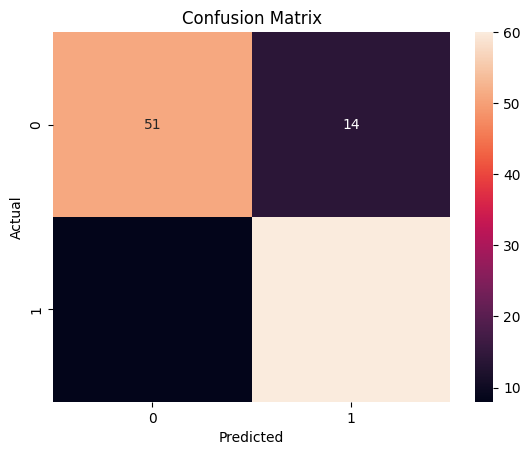

In [20]:
from sklearn.metrics import confusion_matrix,classification_report
cf =classification_report(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
import matplotlib.pyplot as plt
import seaborn as sns

ax = plt.subplot()
sns.heatmap(cm,annot=True, ax=ax)

ax.set_xlabel("Predicted");ax.set_ylabel('Actual');
ax.set_title("Confusion Matrix")

print(cm)
print(cf)

In [21]:
# import pickle
# import joblib
# filename = "loan_model.pkl"
# joblib.dump(classifier,filename)

In [22]:
# filename2="scalers.pkl"
# joblib.dump(sc,filename)

In [29]:
filename = "allcol.pkl"
joblib.dump(columns,filename)


['allcol.pkl']